In [38]:
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
import os
from PIL import Image

In [39]:
def load_tumor_images():
    path= "./raw_data/Training"
    # Abs -> ~/code/CatalinaGroba/tumor_classification/...
    # Relative -> ./
    
    classes = {'glioma_tumor':0,'meningioma_tumor':1,'pituitary_tumor':2,'no_tumor':3}
    imgs = []
    labels = []
    images = []
    for (name, index) in classes.items():
        curr_images = [elt for elt in os.listdir(os.path.join(path, name)) if 'Zone' not in elt] # This gets all images' names from all different folders

        for img_name in tqdm(curr_images): # Iterate over all names from curr_images
            path = os.path.join(path, name, img_name) # Get the path for every specific image
            if os.path.exists(path): # If correct path
                image = Image.open(path)
                image = image.resize((256, 256))
                images.append(np.array(image)) # Open, resize and append as array to images
                labels.append(index)
            path= "./raw_data/Training"

    X = np.array(images)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)

    # Finally we shuffle:
    not_shuffled_x = X
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    first_split = int(len(images) /6.)
    second_split = first_split + int(len(images) * 0.2)
    X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes, not_shuffled_x

X_train, y_train, X_val, y_val, X_test, y_test, num_classes, not_shuffled_x = load_tumor_images()

100%|██████████| 395/395 [00:01<00:00, 243.97it/s]


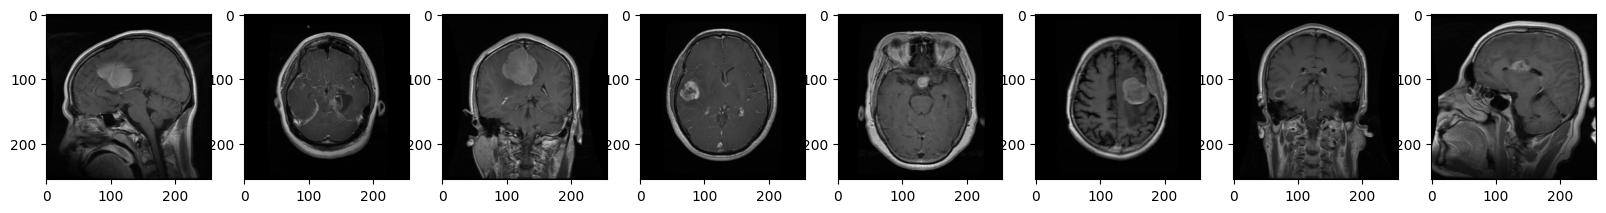

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X_train[i])

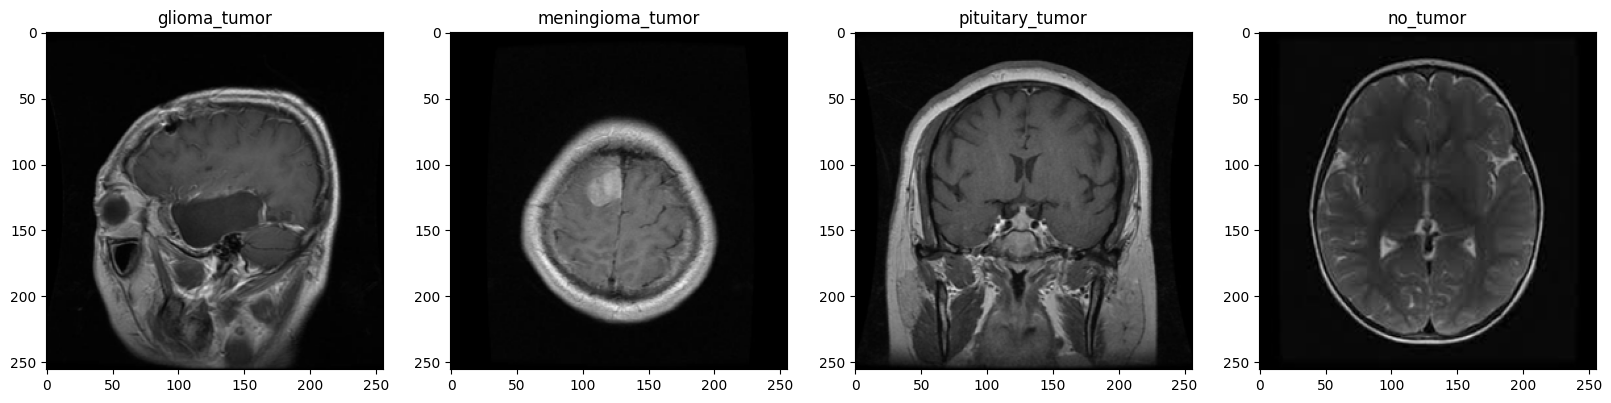

In [68]:
labels = ['glioma_tumor', 'meningioma_tumor', 'pituitary_tumor', 'no_tumor']
plt.figure(figsize=(20,15))
for index, val in enumerate([0, 830, 1700, -1]):
    plt.subplot(1, 4,index + 1)
    plt.imshow(not_shuffled_x[val])
    plt.title(labels[index])